# Assignment (Transient)

# Assignment Transient Groundwater Flow

## Course 2020-2021

@ prof. dr.ir. T.N. Olsthoorn Jan 20, 2021

tolsthoorn@gmail.com

A groundwater extraction station with three wells is to be realized in a very long, 5 km wide, almost straight valley. The valley is bounded by bedrock while the sediments below the water table can be considered a 50 m thick, layer of sand on top of pratically impervious material. As shown in the cross section of  Figure 1, a river, that may be considered fully penetrating and in direct contact with the aquifer, flows along one of the valley walls. The water table is 5 m below ground surface at the center line of the valley, where the wells are to be installed. As is shown on the map in Figure 2, the three wells will be placed 500 m apart along the center line of the valley. Each well will pump 2400 m3/d.

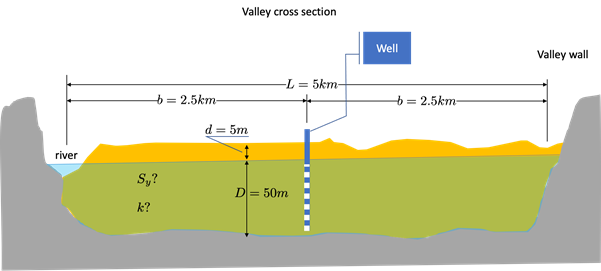

*Figure 1 Cross section through the valley*

One pumping well and three observation wells were installed first, and a pumping test was done on it to determine the aquifer properties, i.e. its transmissivity kD and its storage coefficient, i.e. its specific yield Sy. The pumping lasted for 1 montsh (30 days) at a rate of 600 m3/d. During this time, the heads in the well and in the piezometers were monitored from which the drawdown relative to the initial situation was determined. These darwdowns are  provided in a table in a accompanying spreadsheet. The header of the table shows at which distance from this well the observation wells were placed. These observation wells (also called piezometers) are not shown on the cross section and the map because they are too close to the well to be shown on this scale.

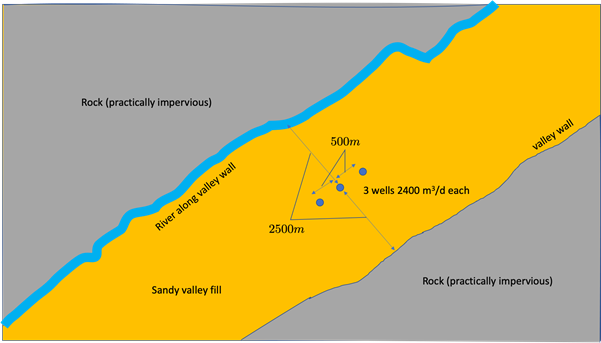

*Figure 2: Map of the valley with the final three well in place. The observation wells used in the pumping test are not shown as they are too close to the well for the scale of this map.*

Each student obtains a spreadsheet with unique the pumping-test data. You find the spreadsheet with your name in the folder on BBB named “Assignment”. 

# Assignment questions

 Assignment questions
 
    1)	With the drawdown data given in the accompanying spreadsheet, determine the aquifer properties kD and Sy.
    2)	How far out into the aquifer does the drawdown during the pumping test reach?
    3)	Is there during the pumping test an influence from the river and or the valley wall on the drawdowns?
    4)	What will be the development of the drawdown in the final 3 wells assuming they are fully penetrating and are not clogged?
    5)	Show the development of the drawdown along a line perpendicular to the valley axis through the center well.
    6)	Show the development of the drawdown along the valley axes through the 3 wells. 
    7)	Show the development of the inflow from the river into the aquifer due to the three wells.
    8)	Show the drawdown in a map after it has become steady srate.
    9)	What is the required depth of the pumps, given that the wells have an extra drawdown due to partial penetration and clogging which doubles the drawdown relative to the case of unclogged fully penetrating well and given that the top of the pump has to be at least 1.5 m below the water table in the well.

        
Tip: Set the computation up for a single arbitrary point first not worrying about superposition the results for many points (like along a line or in a map) and not worrying about superposition across the river and the valley wall. This can all be included step by step.


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import exp1 as w # Theis well function

def set_fig_size (w=12, h=8):
    """" set the size of the current figure to width w and height h in inches."""
    fig = plt.gcf()
    fig.set_size_inches(w, h)

# Get and show our data (pumping test data)


In [151]:
file = 'Bobsammy.xlsx'
pdata = pd.read_excel(file, index_col= 'days')
pdata

,r=0 m,r=11 m,r=16 m,r=43 m
days,,,,
0.001000,0.210547,-0.000345,0.000721,-0.000653
0.001110,0.214284,-0.000146,0.000723,-0.000647
0.001232,0.218022,0.000120,0.000730,-0.000639
0.001367,0.221761,0.000465,0.000746,-0.000631
0.001517,0.225500,0.000901,0.000776,-0.000622
...,...,...,...,...
19.780054,0.569188,0.302368,0.266497,0.199130
21.950828,0.568397,0.299325,0.278450,0.204928
24.359836,0.577363,0.306320,0.272310,0.197850


In [152]:
pdata.columns

Index(['r=0 m', 'r=11 m', 'r=16 m', 'r=43 m'], dtype='object')

In [4]:
file = 'Dukuray_Mohamed Abdulai_1060427'

pdata = pd.read_excel(file)

FileNotFoundError: [Errno 2] No such file or directory: 'Dukuray_Mohamed Abdulai_1060427'

In [5]:
pwd

'C:\\Users\\mdu001\\Desktop\\Transient Flow\\Dukuray1060427'

In [153]:
r_pz = (0.25, 11, 16, 43)
times = np.asarray(pdata.index)

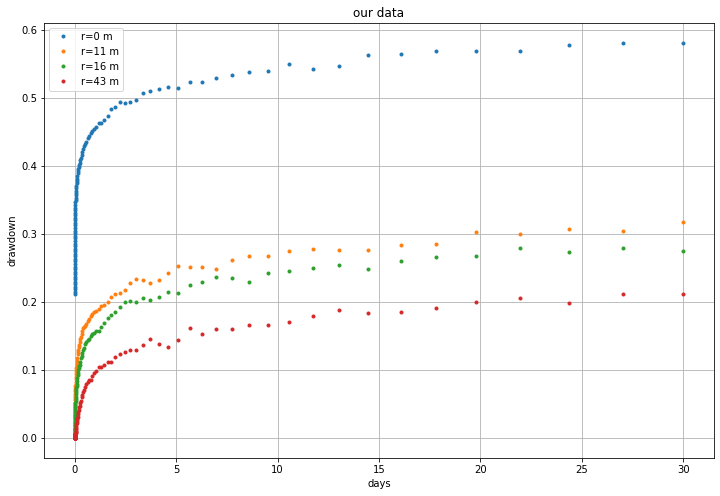

In [154]:
plt.title ("our data")
plt.xlabel ("days")
plt.ylabel ("drawdown")
plt.grid()

set_fig_size()

for col in pdata.columns:
    plt.plot(times, pdata[col],".",label = col)
    
plt.legend()

# Plot on double log scales   

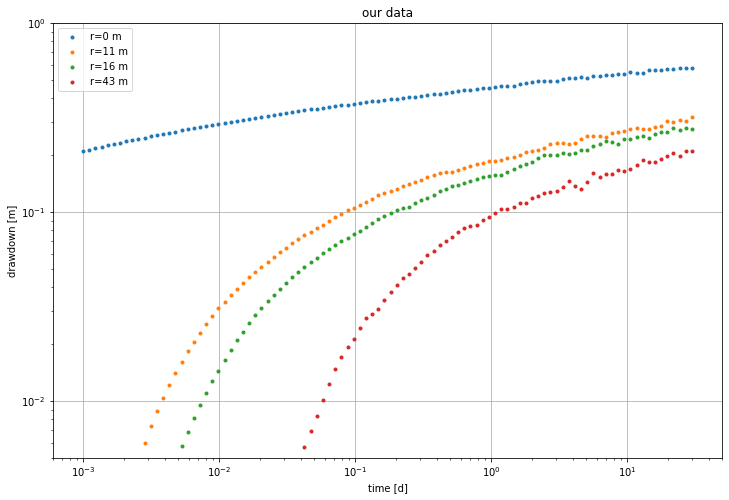

In [155]:
plt.title ("our data")
plt.xlabel ("time [d]")
plt.ylabel ("drawdown [m]")
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.ylim (5e-3, 1)

set_fig_size()
for col in pdata.columns:
    plt.plot(times, pdata[col],".",label = col)
    
plt.legend()

## Plot on double logs versus $\frac {t}{r^2} $ instead of versus $t$

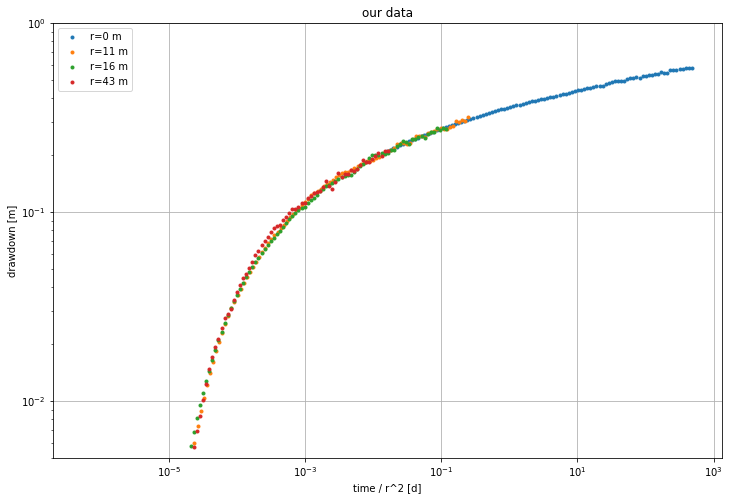

In [156]:
plt.title ("our data")
plt.xlabel ("time / r^2 [d]")
plt.ylabel ("drawdown [m]")
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.ylim (5e-3, 1)

set_fig_size()
for r, col in zip(r_pz, pdata.columns):
    plt.plot(times/ r**2, pdata[col],".",label = col)
    
plt.legend()

## Our data on versus $\log(t)$

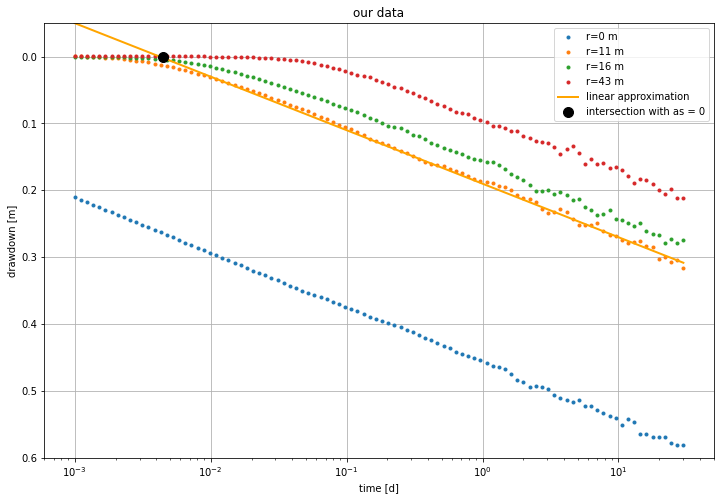

In [157]:
plt.title ("our data")
plt.xlabel ("time [d]")
plt.ylabel ("drawdown [m]")
plt.grid()
plt.xscale('log')
plt.yscale('linear')

# plt.ylim (5e-3, 1)
plt.ylim (0.6, -0.05 )

y0 = 0.19
a = 0.080
# drawdown per log cylce
y = y0 + a * np.log10(times)

s0 = 0 # n
ts = 4.5e-3 # d
set_fig_size()
for col in pdata.columns:
    plt.plot(times, pdata[col],".",label = col)
plt.plot(times, y, lw=2, color = 'orange', label = 'linear approximation')   
plt.plot(ts, s0, 'o', ms= 10 , color = 'black', label = 'intersection with as = 0')
plt.legend()

$$s_{10t} - s_t = \frac{Q}{4 \pi kD} \log (10)$$

$$ kD = \frac{Q}{4\pi \left (s_{10t}- s_t\right )} \log (10) $$

$$ kD \approx \frac{2.3\,  Q}{4\pi \left (s_{10t}- s_t\right )}  $$

$$ s\approx \frac{Q}{4 \pi kD} \ln\left(\frac{2.25 kD t}{ r^2 S} \right) $$

$$ \frac{2.25 kD t}{ r ^2 S} = 1$$



$$ S= \frac{2.25 kD t_{s=0}}{r ^ 2}$$

In [158]:
Q = 600 # m3/day
kD = 2.3 * Q /( 4 * np.pi * a)

S = 2.25 * kD * ts / 11 ** 2

print('kD =', kD , ', S = ', S)

print('kD = {:.0f} m2/d\nS= {:.2} [-]'.format (kD, S))


kD = 1372.7113841675973 , S =  0.11486531210493323
kD = 1373 m2/d
S= 0.11 [-]


# Define the three wells and compute the dd at one point as the function of time

In [159]:
# Dictionary of wells

wells = {1: {'x':0, 'y':-500, 'Q':2400},
        2: {'x':0, 'y':0, 'Q':2400},
        3: {'x':0, 'y':+500, 'Q':2400}}

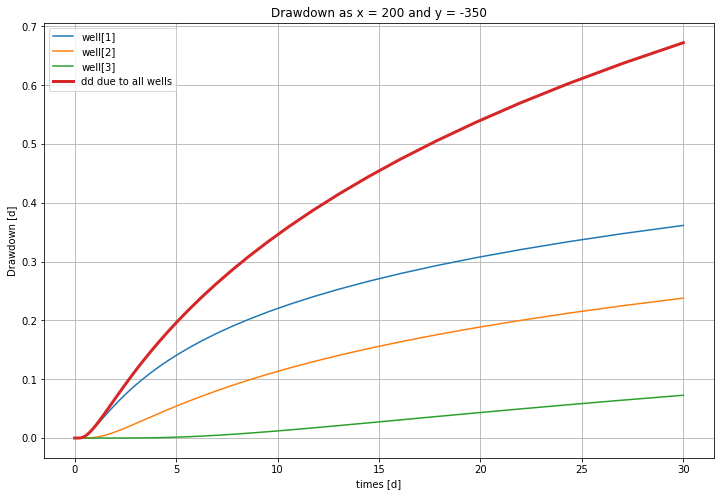

In [212]:
x = 200.
y = -350.

times = np.asarray(pdata.index)

plt.title("Drawdown as x = {:.0f} and y = {:.0f}".format(x, y))
plt.xlabel("times [d]")
plt.ylabel("Drawdown [d]")
plt.grid()

set_fig_size()

s_total = np.zeros_like(times)

for key in wells:
    well = wells [key]
    r = np.sqrt((x - well ['x']) **2 + (y-well['y']) **2)
    u = r **2 * S /( 4 * kD * times)
    s = well ['Q'] / (4 * np.pi* kD ) * w(u)
    plt.plot(times, s, label= 'well[{}]'.format(key))
    
    #s_total = s_total + s
    s_total+= s
plt.plot(times, s_total, lw=3, label= 'dd due to all wells')

plt.legend()

# Drawdown at many points for several times

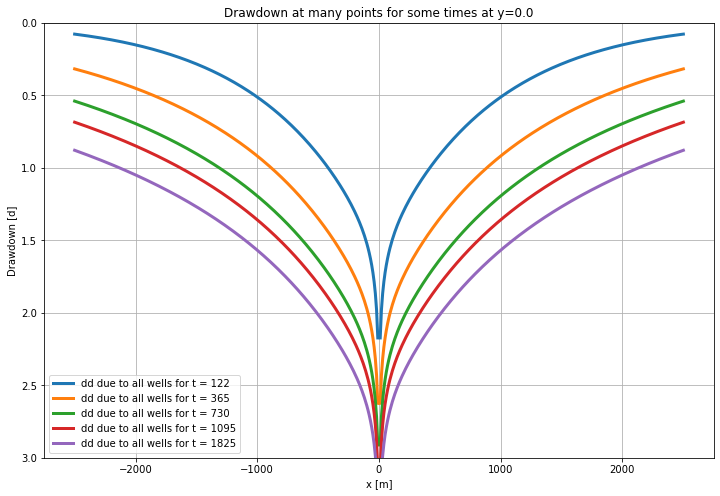

In [217]:
times = np.array([1/3, 1, 2, 3, 5]) * 365
y= 0

X = np.linspace (-2500, 2500, 501)
Y = np.zeros_like(X)+ y

plt.title("Drawdown at many points for some times at y={:.1f}".format(y))
plt.xlabel("x [m]")
plt.ylabel("Drawdown [d]")
plt.grid()
plt.ylim(3, 0)

set_fig_size()

for t in times:
    s_total = np.zeros_like(X)
    
    for key in wells:
        well = wells [key]
        r = np.sqrt((X - well ['x']) **2 + (Y-well['y']) **2)
        u = r **2 * S /( 4 * kD * t)
        s = well ['Q'] / (4 * np.pi* kD ) * w(u)
        #plt.plot(X, s, label= 'well[{}]'.format(key))
         #s_total = s_total + s
        s_total+= s
    plt.plot(X, s_total, lw=3, label= 'dd due to all wells for t = {:.0f}'.format(t))

plt.legend()

# Drawdown along lines parallel to the axis of the vally for different times

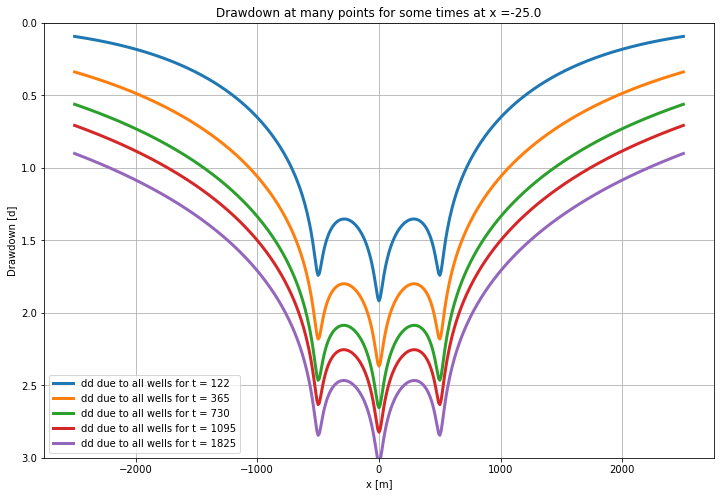

In [225]:
times = np.array([1/3, 1, 2, 3, 5]) * 365

x = -25

Y = np.linspace (-2500, 2500, 501)
X = np.zeros_like(X)+ x

plt.title("Drawdown at many points for some times at x ={:.1f}".format(x))
plt.xlabel("x [m]")
plt.ylabel("Drawdown [d]")
plt.grid()
plt.ylim(3, 0)

set_fig_size()

for t in times:
    s_total = np.zeros_like(X)
    
    for key in wells:
        well = wells [key]
        r = np.sqrt((X - well ['x']) **2 + (Y-well['y']) **2)
        u = r **2 * S /( 4 * kD * t)
        s = well ['Q'] / (4 * np.pi* kD ) * w(u)
        #plt.plot(X, s, label= 'well[{}]'.format(key))
         #s_total = s_total + s
        s_total+= s
    plt.plot(Y, s_total, lw=3, label= 'dd due to all wells for t = {:.0f}'.format(t))

plt.legend()

# Continue with just on wells, because of the details of three individual wells don't matter at larger distances ( Valley is 5km wide, and the distance between the wells was only 500m)

# To compute the drawdown we need to mirror the well in the center of the valley with respect to the river on the left and the  closed side at the right

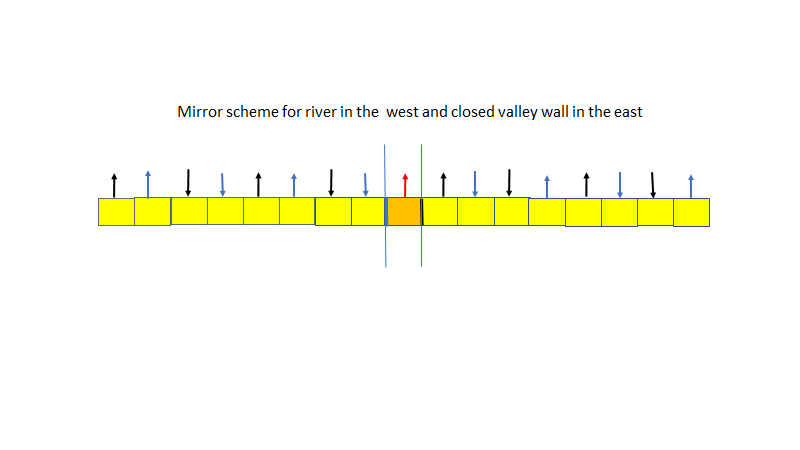

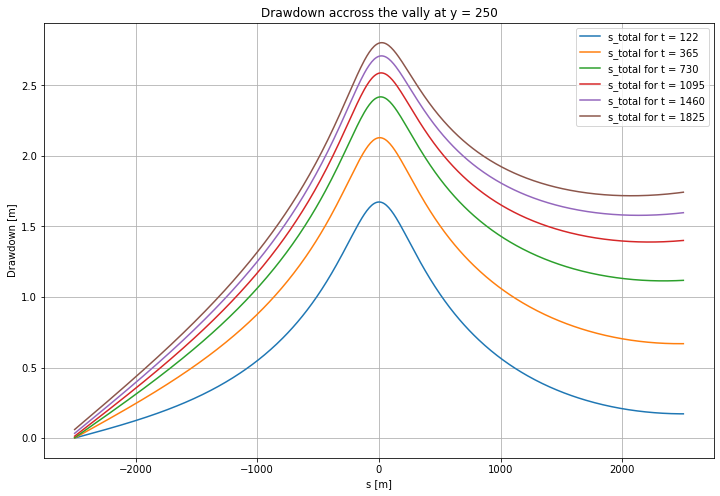

In [238]:
plt.title("Drawdown accross the vally at y = {:.0f}". format (y))
plt.xlabel("s [m]")
plt.ylabel("Drawdown [m]")
plt.grid()

set_fig_size()


Q = 2400 * 3 # sum of the three wells that we installed
kD = 1373
S = 0.11
L = 5000
y = 250

X = np.linspace(-L/2, L/2, 501)
Y = np.zeros_like(X) + y
# Y
times = np.array([1/3, 1, 2, 3, 4, 5]) * 365
for t in times:
    r = np. sqrt(X ** 2 + Y ** 2)
    u = r ** 2 * S /(4 *kD * t)
    s_total = Q / (4 * np.pi * kD) * w(u)
    for n in range (1, 20):
        # Blue wells left y
        Xn = (2* n - 1) * L + X
        r = np.sqrt (Xn ** 2 + Y ** 2)
        u = r ** 2 * S /(4 *kD * t)
        Qn = (-1) ** n * Q
        s = Qn / (4 * np.pi * kD) * w(u)
        s_total += s

        # Black wells left
        Xn = 2* n  * L + X
        r = np.sqrt (Xn ** 2 + Y ** 2)
        u = r ** 2 * S /(4 *kD * t)
        Qn = (-1) ** n * Q
        s = Qn / (4 * np.pi * kD) * w(u)
        s_total += s


        # Black wells east
        Xn = (2 * n - 1) * L - X
        r = np.sqrt (Xn ** 2 + Y ** 2)
        u = r ** 2 * S /(4 *kD * t)
        Qn = (-1) ** (n - 1)* Q
        s = Qn / (4 * np.pi * kD) * w(u)
        s_total += s


        # Blue wells east
        Xn = 2 * n * L - X
        r = np.sqrt (Xn ** 2 + Y ** 2)
        u = r ** 2 * S /(4 *kD * t)
        Qn = (-1) ** (n - 1)* Q
        s = Qn / (4 * np.pi * kD) * w(u)
        s_total += s

    plt.plot(X, s_total, label = "s_total for t = {:.0f}".format(t))
    
plt.legend()
